# Importing Libraries for working with Prophet
1. matplotlib.pyplot is stateful, in that it keeps track of the current figure and plotting area, and the plotting functions are directed to the current axes
2. importing the pandas for dataanalysis// reading the csv file
3. importing the fbprophet for prediction, forecasting
4. the %matplotlib inline will make your plot outputs appear and be stored within the notebook


In [1]:
pwd


'C:\\Users\\sruja\\Desktop\\Notebook'

In [5]:
import os 
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

Here we are Reading our data, and storing the data in a variable

In [4]:
df=pd.read_csv(r"C:\Users\sruja\Desktop\Notebook\montly meat production.csv")

In [6]:
df.head()

,Month,"Monthly meat production: pounds from animals, from Jan 62 to Dec 75"
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [7]:
df.tail()

,Month,"Monthly meat production: pounds from animals, from Jan 62 to Dec 75"
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,NaN,NaN
169,Monthly milk production: pounds per cow. Jan 6...,NaN


Here, by using the commands head and tail , we are able to access the data from top of csv file and bottom of the csv file

 Here, in 168,169 th Line we neeed to remove those lines   df.drop(168,axis=0,inplace=True)

In [17]:
 df.drop(168,axis=0,inplace=True)

KeyError: '[168] not found in axis'

In [18]:
 df.drop(169,axis=0,inplace=True)

KeyError: '[169] not found in axis'

In [19]:
df.tail()

,Month,"Monthly meat production: pounds from animals, from Jan 62 to Dec 75"
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [21]:
df.column=["ds","y"]

<AxesSubplot:>

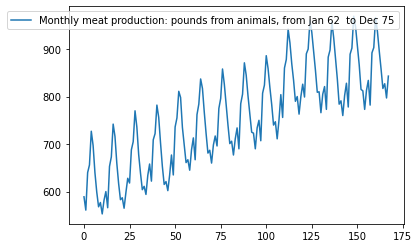

In [22]:
df.plot()

In [23]:
df.head()

,Month,"Monthly meat production: pounds from animals, from Jan 62 to Dec 75"
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [24]:
df.column=["ds","y"]

In [25]:
df.head()

,Month,"Monthly meat production: pounds from animals, from Jan 62 to Dec 75"
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [26]:
df.columns=['ds','y']

In [27]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [28]:
df['ds']=pd.to_datetime(df['ds'])

In [29]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

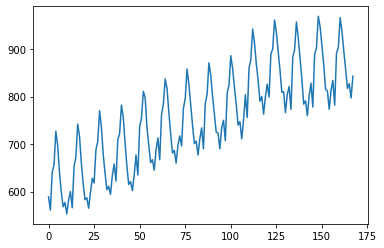

In [30]:
df['y'].plot()

In [31]:
df['y']=df['y']-df['y'].shift(1)

<AxesSubplot:>

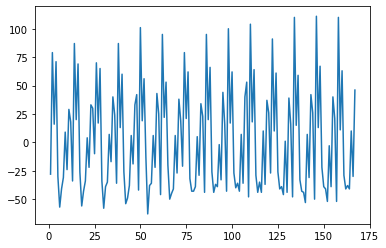

In [32]:
df['y'].plot()

In [33]:
from fbprophet import Prophet

In [35]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [36]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


Modelling Which Can used to get the trend in graphical presentation in graph, Weekly, Yearly, Montly,Etc....

In [39]:
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [41]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [42]:
#Creating future 365 days
future_dates=model.make_future_dataframe(periods=365)

In [43]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [46]:
prediction=model.predict(future_dates)

In [47]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,2.039961,17.352912,36.634702,2.039961,2.039961,24.995850,24.995850,24.995850,24.995850,24.995850,24.995850,0.0,0.0,0.0,27.035811
1,1962-02-01,2.038259,-47.352525,-28.438782,2.038259,2.038259,-40.254571,-40.254571,-40.254571,-40.254571,-40.254571,-40.254571,0.0,0.0,0.0,-38.216312
2,1962-03-01,2.036721,85.583612,104.123263,2.036721,2.036721,93.020544,93.020544,93.020544,93.020544,93.020544,93.020544,0.0,0.0,0.0,95.057265
3,1962-04-01,2.035019,7.123729,26.272628,2.035019,2.035019,14.324346,14.324346,14.324346,14.324346,14.324346,14.324346,0.0,0.0,0.0,16.359364
4,1962-05-01,2.033371,53.011067,72.072619,2.033371,2.033371,60.541099,60.541099,60.541099,60.541099,60.541099,60.541099,0.0,0.0,0.0,62.574470


In [48]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,12.837593,3.134739,22.401892
529,1976-11-27,18.284245,8.828928,28.015284
530,1976-11-28,23.863742,14.185856,32.741212
531,1976-11-29,29.463572,20.909167,38.938875
532,1976-11-30,34.965354,25.472118,44.234511


In [49]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,27.035811,17.352912,36.634702
1,1962-02-01,-38.216312,-47.352525,-28.438782
2,1962-03-01,95.057265,85.583612,104.123263
3,1962-04-01,16.359364,7.123729,26.272628
4,1962-05-01,62.574470,53.011067,72.072619


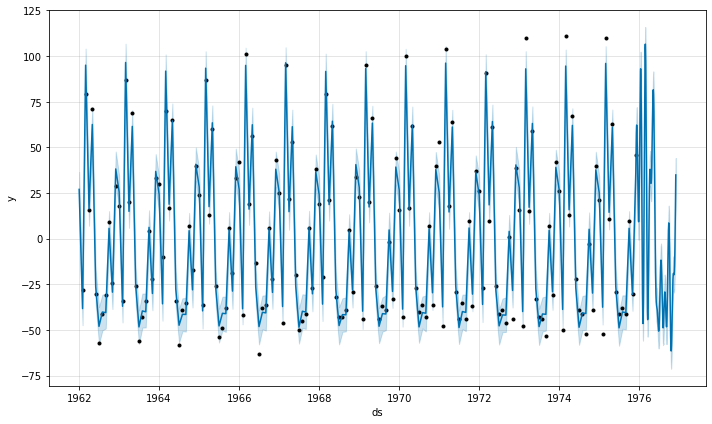

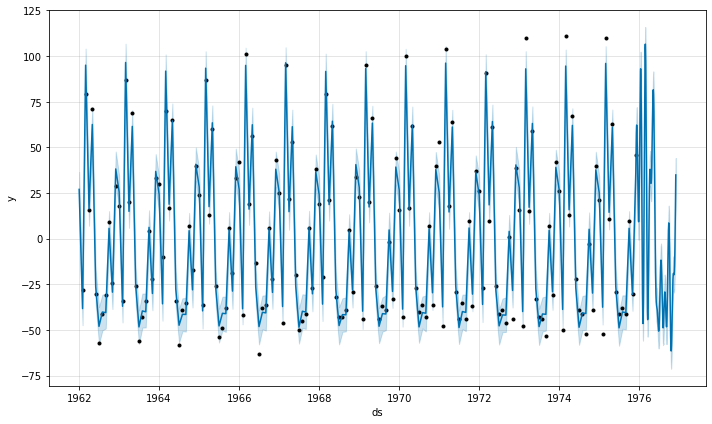

In [50]:
#Prediction is for one day, # forecasting is for future like year
#Forecasting
#Plot the Predicted Projection
model.plot(prediction)

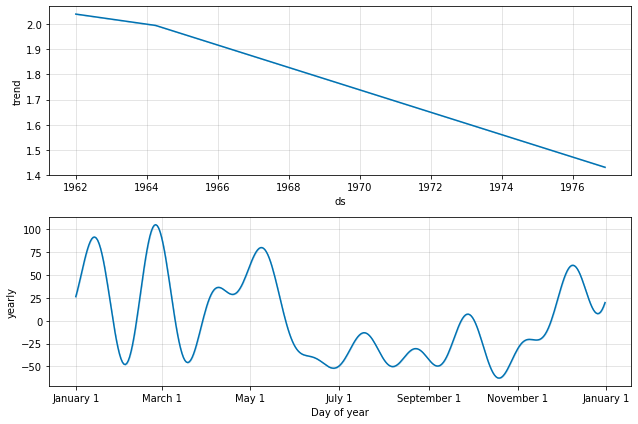

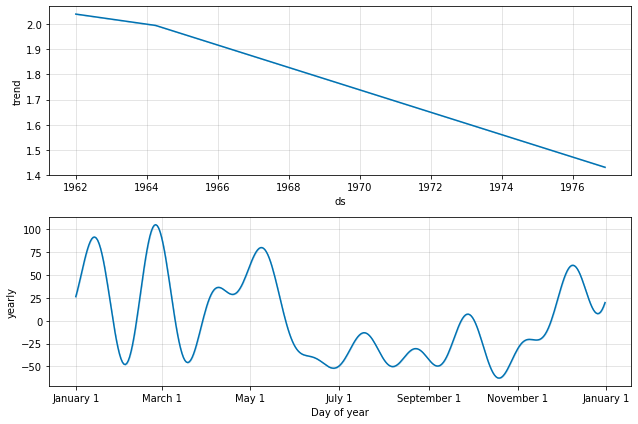

In [51]:
### Visualize Rach Components[Trends, Weekly]
model.plot_components(prediction)

In [52]:
df.shape

(168, 2)

In [53]:
#### Cross validation

from fbprophet.diagnostics import cross_validation

In [54]:
df_cv=cross_validation(model,horizon='365 days',period='180 days',initial='1095 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00


In [55]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898372,-46.732945,-35.496369,-49.0,1965-07-21
1,1965-09-01,-34.869323,-40.767788,-29.487729,-38.0,1965-07-21
2,1965-10-01,6.103171,0.733701,11.547528,6.0,1965-07-21
3,1965-11-01,-20.281526,-26.248870,-15.017282,-19.0,1965-07-21
4,1965-12-01,36.035431,30.391974,41.240113,33.0,1965-07-21


In [56]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
235,1975-08-01,-40.613462,-49.906183,-31.125469,-38.0,1974-12-01
236,1975-09-01,-40.592902,-49.226435,-30.923845,-41.0,1974-12-01
237,1975-10-01,4.734437,-5.230087,13.755480,10.0,1974-12-01
238,1975-11-01,-30.695140,-40.312487,-21.367724,-30.0,1974-12-01
239,1975-12-01,34.682340,25.574692,44.107495,46.0,1974-12-01


In [57]:
from fbprophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,123.584092,11.116838,9.150617,0.263083,0.196871,0.458333
1,42 days,115.490860,10.746667,8.606019,0.233431,0.177038,0.541667
2,43 days,123.835809,11.128154,8.853209,0.227125,0.177038,0.541667
3,46 days,89.936969,9.483510,7.912417,0.214467,0.177038,0.583333
4,47 days,87.912235,9.376152,7.726750,0.211312,0.177038,0.604167


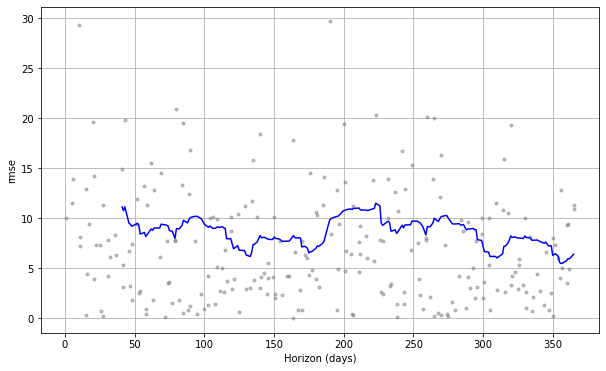

In [58]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')

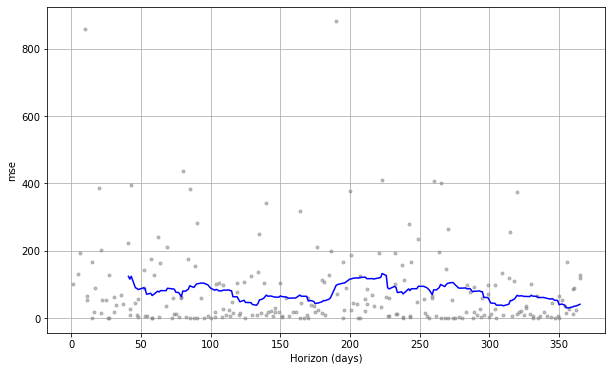

In [59]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse') #Mean Square Error